#**Data Smpling in  Machine learning**
- Sampling is a process of selecting the subset of the population with the help of sample, the researcher would be able to draw conclusions that would be generalizable to the population.
- As the population comparise of many units usually large number and sometimes infinite in many cases, it is practically impossible to include all the units for study.Hence ,in research process, a part of the population is considered.
- When the sample size is greater and nearer to the actual population,the chances of sampling error reduces significantly.The decrease in sampling errors significantly increase the validity of the data analysis.

#**Different Types of Sampling Techniques:**

##**(A)Probability Sampling:** 
A type of sampling technique in which every unit of the population has equal chance of being selected in the sample is known as probability sampling.In this  method, selection of the sample is based on the theory of probability.Probability  sampling is further sub-classified in the following types.

- **(a)Simple random sampling:** In this method, each and evry unit of the population has equal chance of being included in the sample.
- **(b) Systematic sampling:** A sampling techniques in which only the first unit is selected with the help of random numbers and the rest get selected automatically according to some pre-designed pattern is known as systematic sampling.
Let the population units are numbered from 1 to N in some order.Let N=nk, where n is the sample size and k is an integer. Here,K=N/n known as sample interval.One unit be selected at randomly first,let it be i, then other sucessive sample are i+k,i+2k,....,i+(n-1)k.
This type of systematic sampling is known as linear systematic sampling.
- **(c)Stratified sampling:** In this technique, first the whole population is divided into homogeneous group under certain criterion.These group are called strata.Then the sample is drawn from each stratum.Proper care should be taken while making strata.


- **(d)Cluster Sampling:** The entire population is divided into the smallest unit.A group of such unit is known as cluster.When the sampling unit is cluster,the procedure is called cluster sampling and a whole cluster is randomly selected to be included in the study.
This type of sampling is used when we focus on a specific region or area.



##**(B)Non-Probability Sampling:**
The sample is selected on the basis of personal knowledge,opinion and discretion of the sampler.
- **(a)Convenience Sampling:**This is perhaps the easiest method of sampling because individuals are selected based on their availability and willingness to take part.
- **(b)Quota Sampling:**In this type of sampling, we choose items based on predetermined characteristics of the population. Consider that we have to select individuals having a number in multiples of five for our sample.
- **(c)Judgment Sampling:**It is also known as selective sampling. It depends on the judgment of the experts or researcher.
- **(d)Snowball Sampling:**This sampling method involves a primary data source nominating other potential data sources that will be able to participate in the research studies. Snowball sampling method is purely based on referrals and that is how a researcher is able to generate a sample. Therefore this method is also called the chain-referral sampling method.This method of sampling is effective when a sampling frame is difficult to identify.




###**let’s obtain samples from a set of 10 products using probability sampling to determine the population mean of a particular measure of interest:**

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd

# Set random seed  to makes the random numbers predictable.
np.random.seed(0)

# Define total number of products
number_of_products = 10

# Create data dictionary
data = {'product_id':np.arange(1, number_of_products+1).tolist(),
       'measure':np.round(np.random.normal(loc=10, scale=0.5, size=number_of_products),3)}

# Transform above  dictionary into a data frame
df = pd.DataFrame(data)

# Store the real mean in a separate variable for further analysis.
real_mean = round(df['measure'].mean(),3)

# View data frame
df

,product_id,measure
0,1,10.882
1,2,10.200
2,3,10.489
3,4,11.120
4,5,10.934
5,6,9.511
6,7,10.475
7,8,9.924
8,9,9.948
9,10,10.205


###**Simple random sampling:**

In [ ]:
# Obtain simple random sample
simple_random_sample = df.sample(n=4).sort_values(by='product_id')

# Save the sample mean in a separate variable
simple_random_mean = round(simple_random_sample['measure'].mean(),3)

# View sampled data frame
simple_random_sample

,product_id,measure
2,3,10.489
4,5,10.934
5,6,9.511
7,8,9.924


###**Systematic sampling:**

In [ ]:
# Define systematic sampling function
def systematic_sampling(df, step):
    indexes = np.arange(0,len(df),step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample
    
# Obtain a systematic sample and save it in a new variable 
systematic_sample = systematic_sampling(df, 3) #diff. in number range is 3.

# Save the sample mean in a separate variable
systematic_mean = round(systematic_sample['measure'].mean(),3)

# View sampled data frame
systematic_sample

,product_id,product_strata,measure,cluster_id
0,1,1,10.610,1
3,4,1,9.938,2
6,7,2,11.004,4
9,10,2,10.814,5


In [ ]:
print(systematic_mean)

10.67


###**Stratified sampling:**



In [ ]:
# Create data dictionary and whole population is divided into homogeneous group called strata 
data = {'product_id':np.arange(1, number_of_products+1).tolist(),
       'product_strata':np.repeat([1,2], number_of_products/2).tolist(), #Divide population into 2 sub-group[1,2],since number of product also divide by 2.
       'measure':np.round(np.random.normal(loc=10, scale=0.5, size=number_of_products),3)}

# Transform dictionary into a data frame
df = pd.DataFrame(data)

# View data frame
df

,product_id,product_strata,measure
0,1,1,10.610
1,2,1,9.330
2,3,1,10.214
3,4,1,9.938
4,5,1,10.707
5,6,2,9.938
6,7,2,11.004
7,8,2,10.115
8,9,2,10.302
9,10,2,10.814


In [ ]:
# Import StratifiedShuffleSplit which gives train-test indices to split the data into train-test sets. 
from sklearn.model_selection import StratifiedShuffleSplit

# Set the split criteria and object of  StratifiedShuffleSplit.
split = StratifiedShuffleSplit(n_splits=1, test_size=4)

# Perform data frame split
for x, y in split.split(df, df['product_strata']):
    stratified_random_sample = df.iloc[y].sort_values(by='product_id')

# Obtain the sample mean for each group
stratified_mean =round(stratified_random_sample.groupby('product_strata').mean().drop(['product_id'],axis=1))

# View sampled data frame
stratified_random_sample



,product_id,product_strata,measure,cluster_id
0,1,1,10.610,1
2,3,1,10.214,2
6,7,2,11.004,4
8,9,2,10.302,5


####**The stratified_mean is (10+11)/2=10.5**



In [ ]:
print(stratified_mean)

                measure  cluster_id
product_strata                     
1                  10.0         2.0
2                  11.0         4.0


###**Cluster Sampling:**

In [ ]:
def cluster_sampling(df, number_of_clusters):
    
    try:
        # Divide the units into cluster of equal size
        df['cluster_id'] = np.repeat([range(1,number_of_clusters+1)],len(df)/number_of_clusters) 

        # Create an empty list
        indexes = []

        # Append the indexes from the clusters that meet the criteria
        # For this formula, clusters id must be an even number
        for i in range(0,len(df)):
            if df['cluster_id'].iloc[i]%2 == 0:
                indexes.append(i)
        cluster_sample = df.iloc[indexes]
        return(cluster_sample)
    
    except:
        print("The population cannot be divided into clusters of equal size!")
        
# Obtain a cluster sample and save it in a new variable
cluster_sample = cluster_sampling(df,5) 

# Save the sample mean in a separate variable
cluster_mean = round(cluster_sample['measure'].mean(),3)
# View sampled data frame
cluster_sample


,product_id,product_strata,measure,cluster_id
2,3,1,10.214,2
3,4,1,9.938,2
6,7,2,11.004,4
7,8,2,10.115,4


###**Compare Sample mean to Real mean and Find te absolute error:**

In [ ]:
 #Create a dictionary with the mean outcomes for each sampling method and the real mean
outcomes = {'sample_mean':[simple_random_mean,systematic_mean,cluster_mean],
           'real_mean':real_mean}

# Transform dictionary into a data frame
outcomes = pd.DataFrame(outcomes, index=['Simple Random Sampling','Systematic Sampling','Cluster Sampling'])

# Add a value corresponding to the absolute error
outcomes['abs_error'] = abs(outcomes['real_mean'] - outcomes['sample_mean'])

# Sort data frame by absolute error
outcomes.sort_values(by='abs_error')

,sample_mean,real_mean,abs_error
Cluster Sampling,10.318,10.369,0.051
Simple Random Sampling,10.514,10.369,0.145
Systematic Sampling,10.670,10.369,0.301


####**Also we have stratified_sample_mean is (10+11)/2=10.5**

###**Comparison of Sampling mean with Real mean:**

- According to the Measure Mean Comparison per Sampling Method Table, the measure mean of the sample obtained through the **Cluster Sampling** technique was the closest one to the real mean, with an absolute error of 0.051 units.

- Sampling represents a useful and effective method for drawing conclusions about a population from a sample. However, analysts and engineers must define sampling techniques with adequate sample sizes capable of reducing sampling bias (e.g. convenience sampling selection bias, systematic sampling bias ,selection bias, environmental bias, non-response bias) to obtain representative samples of a given population.

#**Imbalanced Datasets in Machine Learning**

- When observation in one class is higher than the observation in other classes then there exists a class imbalance.

- One class label has a very high number of observations and the other has a very low number of observations.

- A classification data set with skewed class proportions is called imbalanced. Classes that make up a large proportion of the data set are called **majority classes**. Those that make up a smaller proportion are **minority classes**.

- **Example1:** To detect fraudulent credit card transactions.lets fraudulent transaction is around 492 when compared with non-fraudulent transaction around 284315.In this case model algorithm biased towards  non-fraudulent transaction and try to ignore fraudulent transaction.
- **Example2:**Let us suppose we have a dataset of 1000 patients, out of which 80 are cancer patients and the rest 920 are healthy. This is an example of an imbalanced dataset, as the majority class is about 9 times bigger than the minority class.



##**Techniques to Handle Imbalanced Datasets:**

- Lets use **Credit Card Fraud Detection** dataset from www.kaggle.com
- Dataset values are in numerical form as PCA (Principal Component Analysis) transformation is done on input values. This conversion is done so that the user’s personal details remain hidden and the user’s security is maintained.
- Columns having heads as V1 to V28 show PCA transformed numeric values but time, amount and class features show their genuine values.
- Last Column "Class" is the target variable where "0" is majority class (Non Fraud) and "1" is minority class (Fraud)

In [ ]:
#### Importing Libraries ####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive  #mount your Google Drive in your virtual machine(VM).
drive.mount('/gdrive')          #Access  the data  drive because of different server of colab and drive.

Mounted at /gdrive


In [ ]:
df=pd.read_csv('/gdrive/My Drive/ML Project /Feature Engineering /3.Sampling_Handling_Creation of Features/creditcard.csv',quoting=3)
                                 #Read data file with path location step by step path location from My Drive.

In [ ]:
df.head()   # Last column "Class" is the target variable where "0" is majority class (Non Fraud) and "1" is minority class (Fraud)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


###**Pandas value_counts()** function returns object containing counts of unique values.

In [ ]:
df.Class.value_counts() #since there are 284315 "0" is majority class (Non Fraud) and 492  "1" is minority class (Fraud)


0    284315
1       492
Name: Class, dtype: int64

In [ ]:
print('Non Fraud Cases:',round(df.Class.value_counts(normalize = True)*100, 2)[0], '%')
print('Fraud Cases:',round(df.Class.value_counts(normalize = True)*100, 2)[1], '%')


Non Fraud Cases: 99.83 %
Fraud Cases: 0.17 %


###**seaborn.countplot()** method is used to Show the counts of observations in each categorical bin using bars.
 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


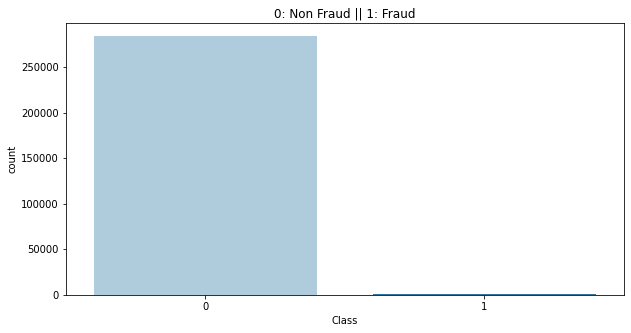

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df.Class,palette = sns.color_palette("Paired", 3))
plt.title('0: Non Fraud || 1: Fraud')
plt.show()

##**(A)Under-Sampling Techniques:**

- Undersampling can be defined as **removing some observations of the majority class**.This is done until the majority and minority class is balanced out.
- Undersampling can be a **good choice when we have a ton of data**  like millions of rows. 
- But a drawback to undersampling is that we are removing information that may be valuable.
-Since  the **resample module from Scikit Learn**  randomly remove samples from the majority class[Non-Fraud "0"].

In [ ]:
from sklearn.utils import resample #resample module from Scikit Learn help in downsample and upsample.

In [ ]:
# Seprate minority(1) and majority(0) classes to use in below code for taking fraud and non-fraud dataset. 
non_fraud = df[df.Class==0]
fraud = df[df.Class==1]


In [ ]:
# Randomly downsample the majority class(remove samples from majority class and balance with minority class).
non_fraud_downsampled = resample(non_fraud,
                          replace=True, # sample with replacement
                          n_samples=len(fraud), # match number with minority class
                          random_state=27) # reproducible results


# Combine minority(fraud) and non_fraud downsampled to get new dataset
downsampled = pd.concat([fraud, non_fraud_downsampled])

downsampled.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

In [ ]:
print(downsampled) #we get new dataset after undersampling and we used this datset to train our model.

            Time        V1        V2  ...       V28  Amount  Class
541        406.0 -2.312227  1.951992  ... -0.143276    0.00      1
623        472.0 -3.043541 -3.157307  ...  0.035764  529.00      1
4920      4462.0 -2.303350  1.759247  ... -0.153029  239.93      1
6108      6986.0 -4.397974  1.358367  ...  0.849573   59.00      1
6329      7519.0  1.234235  3.019740  ...  0.146793    1.00      1
...          ...       ...       ...  ...       ...     ...    ...
54471    46464.0 -0.782140 -1.928194  ...  0.226247  136.00      0
123211   76847.0  1.235179  0.368489  ...  0.022663   29.93      0
39442    39838.0 -0.843287  0.979585  ... -0.015769  100.00      0
213513  139284.0 -1.602545 -0.763530  ... -0.136956    0.89      0
183020  125621.0 -0.394092  0.930495  ...  0.451380    9.03      0

[984 rows x 31 columns]


##**(B)Over-Sampling Techniques:**
- Oversampling can be defined as **adding more copies to the minority class.** This is done until the majority and minority class is balanced out.
- Oversampling can be a good choice when we don’t have a ton of data.
- But a drawback is overfitting  increased since it replicates/duplicates the minority class samples


In [ ]:
# Randomly upsampling the minority class(copied samples from minority class and balance with majority class).
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(non_fraud), # match number with majority class
                          random_state=27) # reproducible results

# combine majority class and upsampled minority
upsampled = pd.concat([non_fraud, fraud_upsampled])

# check new class counts
upsampled.Class.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [ ]:
print(upsampled) ##we get new dataset after upsampling and we used this datset to train our model.

            Time        V1        V2  ...       V28   Amount  Class
0            0.0 -1.359807 -0.072781  ... -0.021053   149.62      0
1            0.0  1.191857  0.266151  ...  0.014724     2.69      0
2            1.0 -1.358354 -1.340163  ... -0.059752   378.66      0
3            1.0 -0.966272 -0.185226  ...  0.061458   123.50      0
4            2.0 -1.158233  0.877737  ...  0.215153    69.99      0
...          ...       ...       ...  ...       ...      ...    ...
176049  122608.0 -2.003460 -7.159042  ...  0.314262  2125.87      1
192687  129808.0  1.522080 -0.519429  ...  0.041881   276.17      1
254344  156685.0 -0.129778  0.141547  ...  0.109192   187.11      1
142405   84694.0 -4.868108  1.264420  ... -0.127944    12.31      1
223618  143456.0 -2.006582  3.676577  ... -0.042393     1.00      1

[568630 rows x 31 columns]


#**Feature Creation in Machine Learning**
- Feature Creation is the process of constructing new features from existing data to train a machine learning model.


##**Polynomial Features Creation:**
- **Polynomial feature creation** is a type of feature engineering that is by the creation of new input features based on the already existing features.
- If a dataset had one input feature A, then a polynomial feature would be the addition of a new feature (column) where values were calculated by squaring the values in A, e.g. A^2. This process can be repeated for each input variable in the dataset, thus creating a transformed version of each feature.

- The polynomial features transform is available in the **scikit-learn** Python machine learning library via the **PolynomialFeatures class.**

- Polynomial function whose general form is f(x)=a$x^2$+b$x$+c, where a ≠ 0.

-  **sklearn.preprocessing.PolynomialFeatures** generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# perform a polynomial features transform of the dataset
trans = PolynomialFeatures(degree=2) #Creat PolynomialFeature object variable
data = trans.fit_transform(df)
# convert the array back to a dataframe
dataset =pd.DataFrame(data)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527
0,1.0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,0.0,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,...,0.037108,-0.005849,41.570058,0.0,0.012204,-0.007394,-0.014200,0.020892,-0.014755,0.002326,-16.529106,-0.0,0.004479,0.008603,-0.012657,0.008939,-0.001409,10.013779,0.0,0.016522,-0.024309,0.017168,-0.002706,19.232059,0.0,0.035764,-0.025258,0.003981,-28.295363,-0.0,0.017838,-0.002812,19.983004,0.0,0.000443,-3.149958,-0.0,22386.1444,0.0,0.0
1,1.0,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,...,0.005737,-0.009404,-1.718028,-0.0,0.010259,-0.034422,0.016932,0.012752,-0.000910,0.001491,0.272465,0.0,0.115496,-0.056812,-0.042785,0.003053,-0.005004,-0.914187,-0.0,0.027946,0.021046,-0.001502,0.002461,0.449688,0.0,0.015849,-0.001131,0.001854,0.338656,0.0,0.000081,-0.000132,-0.024165,-0.0,0.000217,0.039608,0.0,7.2361,0.0,0.0
2,1.0,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,...,-0.042715,-0.046109,292.204122,0.0,0.827031,-0.626841,-0.297962,-0.126496,-0.050339,-0.054339,344.358047,0.0,0.475108,0.225837,0.095877,0.038154,0.041186,-261.003127,-0.0,0.107349,0.045574,0.018136,0.019577,-124.064857,-0.0,0.019348,0.007699,0.008311,-52.670308,-0.0,0.003064,0.003307,-20.959889,-0.0,0.003570,-22.625632,-0.0,143383.3956,0.0,0.0
3,1.0,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,...,0.000331,0.000324,0.651289,0.0,0.036222,0.223736,-0.123209,0.042238,-0.011937,-0.011697,-23.504584,-0.0,1.381977,-0.761039,0.260894,-0.073735,-0.072248,-145.183554,-0.0,0.419096,-0.143671,0.040605,0.039786,79.950940,0.0,0.049252,-0.013920,-0.013639,-27.408212,-0.0,0.003934,0.003855,7.746272,0.0,0.003777,7.590017,0.0,15252.2500,0.0,0.0
4,1.0,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,4.0,-2.316466,1.755474,3.097436,0.806068,-0.814387,0.191843,1.185881,...,0.175160,0.171752,55.871512,0.0,0.018895,-0.019418,0.028318,-0.069044,-0.030161,-0.029575,-9.620691,-0.0,0.019956,-0.029102,0.070957,0.030997,0.030394,9.887276,0.0,0.042440,-0.103477,-0.045203,-0.044324,-14.418611,-0.0,0.252297,0.110214,0.108070,35.155433,0.0,0.048146,0.047209,15.357362,0.0,0.046291,15.058569,0.0,4898.6001,0.0,0.0


###**From above dataset we can see that our features increased from 31 Column  to 528 new column.**

##**Feature Creation from Text Dataset:**
- Text classification is the process of classifying unstructured text data into various category such as technology, sport,medical,math etc.Most of the information are unstructured because of the messy nature of text, this is where text classification with machine learning comes in.
- **Text Classification Applications & Use Cases:**
Some of the top applications and use cases of text classification include:Automate business processes,Email spam filtering,Detecting urgent issues,Automating customer support processes,Listening to the Voice of customer (VoC),Phising and nonphising classification etc.

- **NLTK(natural language tool kit)** is a powerful Python package that provides a set of diverse natural languages algorithms. It is free, opensource, easy to use, large community, and well documented. NLTK consists of the most common algorithms such as tokenizing, part-of-speech tagging, stemming, sentiment analysis, topic segmentation, and named entity recognition.Stopwords provides multiple sources of stopwords, for use in text analysis and natural language processing

- **Stemming:**Stemming is also good practice as it involves reducing a word to its root form. For example Flying is a word and its suffix is ing, if we remove ing from Flying then we will get base word or root word which is “Fly”.

- **Tokenization** is the process by which a large quantity of text is divided into smaller parts called tokens. These tokens are very useful for finding patterns and are considered as a base step for stemming.Tokenizers divide strings into lists of substrings.


- **Create a Vector:**
The next step is to create a vector of all the words.This is now tokenization which is the process of taking each of the words in the observations and making a column for each.**CountVectorizer** is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors (for using in further text analysis).**CountVectorizer creates a matrix** in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample.

- **NOTE: For more details Project name: "Text Classification and Clustering".**



#**Model Selection in Machine Learning**
- Model selection refers to choose the best statistical machine learning model for a particular problem domain.

##**No Free Lunch Theorem:**
- According to the “No Free Lunch” theory, there is no such algorithm that works best on all the possible senarios.

- We should focus of the problem, datset, the cost and other extra informations before choosing an algorithm.


##**Techniques of Model Selection:**


###**(a)Resampling:**
- These are simple techniques just rearranging data samples and inspecting that the model performs good or bad with the data set.
- Some Resampling techniques are **Random Split,Time-Based Split,K-Fold Cross-Validation,Stratified K-Fold,Bootstrap etc.**
- **Random Splits** are used to randomly sample a percentage of data into training, testing, and preferably validation sets. The advantage of this method is that there is a good chance that the original population is well represented in all the three sets.
- In a Machine Learning algorithm we can split the given dataset into training and test data. We can either split randomly or use time based splitting.There are some types of data where random splits are not possible. For example, if we have to train a model for weather forecasting, we cannot randomly divide the data into training and testing sets. This will jumble up the seasonal pattern! Such data is often referred to by the term – **Time Series.**

- The **cross-validation** technique works by randomly shuffling the dataset and then splitting it into k groups.
- The process for **stratified K-Fold** is similar to that of K-Fold cross-validation with one single point of difference – unlike in k-fold cross-validation, the values of the target variable is taken into consideration in stratified k-fold.
- **Bootstrap** is one of the most powerful ways to obtain a stabilized model. It is close to the random splitting technique since it follows the concept of random sampling.








###**Probabilistic measures:**
- Probabilistic Measures do not just take into account the model performance but also the model complexity. Model complexity is the measure of the model’s ability to capture the variance in the data. 
- Some approach are **Akaike Information Criterion (AIC),Bayesian Information Criterion (BIC),Minimum Description Length (MDL).**

- **Akaike Information Criterion (AIC)** is common knowledge that every model is not completely accurate. There is always some information loss which can be measured using the KL information metric. Kulback-Liebler or KL divergence is the measure of the difference in the probability distribution of two variables.

- **AIC= (2K-2Log(L))/N** Where,K = number of independent variables or predictors ,L = maximum-likelihood of the model ,N = number of data points in the training set (especially helpful in case of small datasets)

- **Bayesian Information Criterion (BIC)**  was derived from the Bayesian probability concept and is suited for models that are trained under the maximum likelihood estimation.
- **BIC= K*Log(N)-2Log(L)** Where,K = number of independent variables,L = maximum-likelihood,N = Number of sampler/data points in the training set.

- **Minimum Description Length (MDL)** is derived from the Information theory which deals with quantities such as entropy that measure the average number of bits required to represent an event from a probability distribution or a random variable.
- **MDL=L(h)+L(D/h)**,Where,D = predictions made by the model,L(h) = number of bits required to represent the model,L(D/h) = number of bits required to represent the predictions from the model.



# **Machine Learning Pipeline**
- Machine learning pipelines consist of multiple sequential steps that do everything from **data extraction and preprocessing to model training and deployment.**


##**SKlearn Pipelines:**
- Scikit-learn is a powerful tool for machine learning, provides a feature for handling such pipes under the **sklearn.pipeline module called Pipeline.** 

##**AutoML  Pipeline:**

- **Google Cloud AutoML:**by google.
- **Azure AutoML:**by Microsoft.
- **Auto-Sklearn:** is an open-source Python library for AutoML using machine learning models from the scikit-learn machine learning library.
- **AutoKeras:** by DATA Lab of Texas A&M University.